<a href="https://colab.research.google.com/github/MateusGheorghe/LAMP/blob/master/MachineLearningModelTTilT2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
# TensorFlow e tf.keras
import tensorflow as tf

In [0]:
# Librariesauxiliares
import itertools
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
sns.set()
import plotly.express as px
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
import pickle
import pandas as pd
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import matplotlib.pyplot as plt
SMALL_SIZE = 22
MEDIUM_SIZE = 42
BIGGER_SIZE = 62
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [29]:
print(tf.__version__)

2.1.0


In [0]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print ('\nElapsed time is ')
        print (str(time.time() - startTime_for_tictoc))
        print('seconds.\n')
    else:
        print ('\nToc: start time not set\n')

In [0]:
def TIC():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc1
    startTime_for_tictoc1 = time.time()

def TOC():
    import time
    if 'startTime_for_tictoc' in globals():
        print ('\nElapsed time is ')
        print (str(time.time() - startTime_for_tictoc1))
        print('seconds.\n')
    else:
        print ('\nToc: start time not set\n')

In [0]:
TIC()

In [33]:
with open('FeatX0.pickle', 'rb') as filename:
    data = pickle.load(filename)
# with open('FeatX1.pickle', 'rb') as filename:
#    data = pickle.load(filename)
print(data)

{'PCA':             0         1         2         3
0   -0.462714  0.467353  1.179220 -1.147022
1   -0.473318  0.445630  1.166120 -1.105849
2   -0.483762  0.423800  1.152240 -1.064692
3   -0.493919  0.401869  1.137749 -1.023868
4   -0.486881  0.421357  1.133990 -1.059043
..        ...       ...       ...       ...
441  1.940860 -1.829271  2.009975  1.002267
442  1.939265 -1.842192  2.047630  1.019873
443  1.937643 -1.854460  2.084513  1.037541
444  1.935907 -1.866127  2.120780  1.054449
445  1.950978 -1.517952  1.243683  0.629274

[446 rows x 4 columns], 'NMF':             0         1         2         3
0    0.045715  0.012901  0.202696  0.037493
1    0.044969  0.012514  0.202551  0.039797
2    0.044223  0.012142  0.202364  0.042131
3    0.043480  0.011795  0.202129  0.044478
4    0.044140  0.011952  0.202356  0.042926
..        ...       ...       ...       ...
441  0.000000  0.277641  0.032716  0.000000
442  0.000000  0.277447  0.032791  0.000000
443  0.000000  0.277246  0.032869  0

In [34]:
Output_Reg = np.asarray(loadmat('LabelsReg_446samples.mat')['Label_Reg'])
Output_Clas = np.asarray(loadmat('LabelsCla_446samples.mat')['Label_Cla'])
Output_Clas=Output_Clas-1;
print('\nRegression Output shape:')
print(Output_Reg.shape)
print('\nClassification Output shape:')
print(Output_Clas.shape)
class_names1=np.asarray(['nominal','CH','CR','SC','CQ'])
class_names1


Regression Output shape:
(446, 1)

Classification Output shape:
(446, 1)


array(['nominal', 'CH', 'CR', 'SC', 'CQ'], dtype='<U7')

Determinando como nominal todos os defeitos com severidade igual ou inferior a 10%

In [35]:
Feat={}
Feat[0]=np.array(data['PCA'])
for i in range(0,len(Output_Clas)):
    if Output_Reg[i,0] <=0.1:
        Output_Clas[i,0]=0; #Definindo 5 primeiras classes no python        
print(np.transpose(Output_Clas))

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 4 4 4 0]]


In [0]:
#Creating categorical label
Output_Cat=['CQ']*np.size(Output_Clas,axis=0)
for i in range(0,np.size(Output_Clas,axis=0)):
  if Output_Clas[i]==0:
    Output_Cat[i]='ND'
  elif Output_Clas[i]==1:
    Output_Cat[i]='CH'
  elif Output_Clas[i]==2:
    Output_Cat[i]='CR'
  elif Output_Clas[i]==3:
    Output_Cat[i]='SC'  

In [0]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [38]:
df_PCS = pd.DataFrame(data=Feat[0])
for i in range(0,np.size(df_PCS,1)):
  df_PCS = df_PCS.rename(columns = {i:"PC"+str(i)}) 
df_PCS.head()

,PC0,PC1,PC2,PC3
0,-0.462714,0.467353,1.179220,-1.147022
1,-0.473318,0.445630,1.166120,-1.105849
2,-0.483762,0.423800,1.152240,-1.064692
3,-0.493919,0.401869,1.137749,-1.023868
4,-0.486881,0.421357,1.133990,-1.059043


In [39]:
print(df_PCS.shape)

(446, 4)


In [40]:
df_PCS.describe()

,PC0,PC1,PC2,PC3
count,4.460000e+02,4.460000e+02,4.460000e+02,4.460000e+02
mean,4.545442e-16,-2.041217e-17,5.277293e-17,-1.025587e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.401069e-01,-1.866127e+00,-1.654445e+00,-1.634750e+00
25%,-7.162217e-01,-8.356769e-01,-8.289503e-01,-7.326284e-01
50%,-5.243113e-01,-6.560667e-02,-1.141052e-01,-8.104553e-02
75%,7.088987e-01,7.452222e-01,8.117913e-01,3.819022e-01
max,1.952084e+00,1.970356e+00,2.120780e+00,3.717175e+00


Note that the mean is equal to 0 and the std is equal to 1 due to the whiten=true during the PCA 

In [41]:
fig = px.scatter_3d(df_PCS, x='PC0', y='PC1', z='PC2', color=Output_Cat, size=Output_Reg+0.02)
fig.show(renderer="colab")

In [0]:
# corr = df_PCS.corr()
# sns.heatmap(corr,cmap='YlGnBu',vmin=-1,vmax=1)

# Classificação

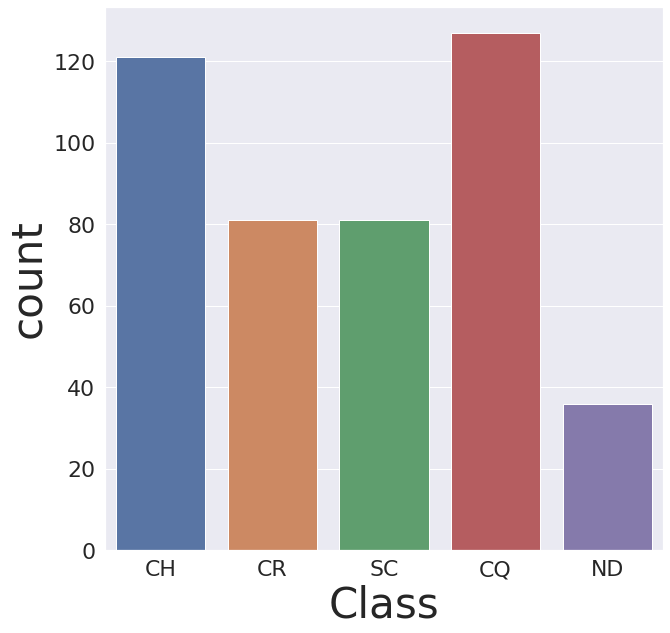

In [43]:
df_Out_Cat=pd.DataFrame(data=Output_Cat, columns=['Class'])
ax = sns.countplot(x="Class",data=df_Out_Cat)
# plt.savefig('Hist_Classes.png')

In [0]:
# def create_classifier(n_neurons=1,n_hidden_layers=1,t_activation='relu'):
#   # create model
#   if n_hidden_layers==1:
#     model = tf.keras.Sequential([tf.keras.layers.Dense(n_neurons, activation=t_activation),tf.keras.layers.Dense(5, activation='softmax')]) #5 classes
#   elif n_hidden_layers==2:
#     model = tf.keras.Sequential([tf.keras.layers.Dense(n_neurons, activation=t_activation),tf.keras.layers.Dense(n_neurons, activation=t_activation),tf.keras.layers.Dense(5, activation='softmax')]) #5 classes
#   # Compile model
#   model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])	
#   return model

In [0]:
def create_classifier(n_neurons=1,n_hidden_layers=1,t_activation='relu',t_optmizer=1,lr=0.001,mom=0.00):
  # create model
  if n_hidden_layers==1:
    model = tf.keras.Sequential([tf.keras.layers.Dense(n_neurons, activation=t_activation),tf.keras.layers.Dense(5, activation='softmax')]) #5 classes
  elif n_hidden_layers==2:
    model = tf.keras.Sequential([tf.keras.layers.Dense(n_neurons, activation=t_activation),tf.keras.layers.Dense(n_neurons, activation=t_activation),tf.keras.layers.Dense(5, activation='softmax')]) #5 classes
  # Compile model
  if t_optmizer==1:
      model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])	
  elif t_optmizer==2:
      sgd=tf.keras.optimizers.SGD(learning_rate=lr, momentum=mom, nesterov=False)
      model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])	
  return model

In [46]:
X=Feat[0]
y=Output_Clas
preprocessParams = preprocessing.StandardScaler().fit(X)
normalized_X = preprocessing.normalize(X)
df_normalized_X=pd.DataFrame(data=normalized_X)
df_normalized_X.describe()

,0,1,2,3
count,446.000000,446.000000,446.000000,446.000000
mean,-0.130891,-0.042831,0.021519,-0.053853
std,0.519446,0.483812,0.509144,0.465554
min,-0.873127,-0.629989,-0.638841,-0.953230
25%,-0.498929,-0.530780,-0.466611,-0.350982
50%,-0.328492,-0.050864,-0.064968,-0.059191
75%,0.321570,0.374023,0.542784,0.218628
max,0.930714,0.944091,0.849508,0.947489


* The number of hidden neurons should be between the size of the input layer and the size of the output layer.
* The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
* The number of hidden neurons should be less than twice the size of the input layer.

In [0]:
# tic()
# K_n=10
# Classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_classifier,batch_size=1, epochs=1, verbose=0)
# T_activation = ['relu'] #['relu', 'tanh'] 
# N_neurons = [5, 10, 15, 20, 100]
# N_hidden_layers=[1,2]
# ##############################################################
# epochs = [100,200, 300] 
# batch_size = [1,2,10,30] 
# param_grid = dict(n_neurons=N_neurons, n_hidden_layers=N_hidden_layers, t_activation=T_activation, epochs=epochs, batch_size=batch_size)
# ##############################################################
# grid = GridSearchCV(estimator=Classifier, param_grid=param_grid, verbose=1, cv=K_n)
# grid_result = grid.fit(normalized_X,y) 
# toc()

In [48]:
from sklearn.model_selection import StratifiedKFold
tic()
classifier={}
test_loss={}
test_acc={}
mean_acc={}
best_acc={}
cont=0
N_executions=5 #Numero de execuções
K=10 #Numero de divisoes do Kfold
model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(5, activation='softmax')
            ]) #5 classes
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])      
X=normalized_X  
I=0   
for J in range(0,N_executions):
  Aux=[]
  skf = StratifiedKFold(n_splits=K)
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier[I,cont]=model.fit(X_train, y_train, epochs=400, verbose=0)           
    test_loss[I,cont], test_acc[I,cont] = model.evaluate(X_test,  y_test, verbose=2)
    Aux=np.append(Aux,test_acc[I,cont])
    cont=cont+1
  mean_acc[I,J]=np.mean(Aux)
  best_acc[I,J]=np.max(Aux)
  print('\nEnd of Executions') 
  print(I+1)    
toc()       

48/48 - 0s - loss: 0.0776 - accuracy: 0.9583
45/45 - 0s - loss: 0.0013 - accuracy: 1.0000
45/45 - 0s - loss: 9.6330e-05 - accuracy: 1.0000
45/45 - 0s - loss: 4.8849e-05 - accuracy: 1.0000
45/45 - 0s - loss: 8.2310e-05 - accuracy: 1.0000
45/45 - 0s - loss: 2.6314e-04 - accuracy: 1.0000
44/44 - 0s - loss: 6.5549e-04 - accuracy: 1.0000
43/43 - 0s - loss: 0.0025 - accuracy: 1.0000
43/43 - 0s - loss: 0.0133 - accuracy: 1.0000
43/43 - 0s - loss: 0.5135 - accuracy: 0.8837

End of Executions
1
48/48 - 0s - loss: 0.0774 - accuracy: 0.9792
45/45 - 0s - loss: 3.0200e-07 - accuracy: 1.0000
45/45 - 0s - loss: 3.1789e-08 - accuracy: 1.0000
45/45 - 0s - loss: 0.0000e+00 - accuracy: 1.0000
45/45 - 0s - loss: 2.6491e-09 - accuracy: 1.0000
45/45 - 0s - loss: 1.6159e-07 - accuracy: 1.0000
44/44 - 0s - loss: 3.5003e-06 - accuracy: 1.0000
43/43 - 0s - loss: 1.0149e-04 - accuracy: 1.0000
43/43 - 0s - loss: 0.0030 - accuracy: 1.0000
43/43 - 0s - loss: 0.3131 - accuracy: 0.9070

End of Executions
1
48/48 - 0s

In [49]:
mean_acc

{(0, 0): 0.984205424785614,
 (0, 1): 0.9886143445968628,
 (0, 2): 0.9906976759433747,
 (0, 3): 0.9953488349914551,
 (0, 4): 0.9976744174957275}

In [50]:
tic()
grid_iterations=500
K_n=10
Classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_classifier,batch_size=1, epochs=1, verbose=0)
T_activation = ['relu','tanh']
N_neurons = np.arange(2,101,1)
N_hidden_layers=[1,2]
T_optmizer=[1,2]
Lr=[1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
Mom=[0.0, 0.5, 0.9, 0.99, 0.999]
##############################################################
epochs = np.arange(50,350,50) 
batch_size = np.arange(1,33,1) 
param_grid = dict(n_neurons=N_neurons, n_hidden_layers=N_hidden_layers, t_activation=T_activation, epochs=epochs, batch_size=batch_size, t_optmizer=T_optmizer, lr=Lr,mom=Mom)
##############################################################
grid = RandomizedSearchCV(Classifier, param_grid, n_iter=grid_iterations,verbose=1, cv=K_n, random_state=2)
grid_result = grid.fit(normalized_X,y) 
toc()
ClasResult={}
ClasResult[0]=grid_result.best_score_
ClasResult[1]=grid_result.best_params_
ClasResult[2]=grid_result.cv_results_
with open('GridResult_500p_Classification.pickle', 'wb') as filename:
    pickle.dump(ClasResult, filename)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed: 577.4min finished
/home/mateus.gheorghe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.




Elapsed time is 
34646.76147532463
seconds.



In [51]:
grid_result

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f77296fe790>,
                   iid='warn', n_iter=500, n_jobs=None,
                   param_distributions={'batch_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
                                        'epochs': array([ 50, 100, 150, 200, 25...
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100]),
                                        't_activation': ['relu', 'tanh'],
  

In [52]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
rank_pos = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank_pos in zip(means, stds, params, rank_pos):
    print("Rank:%d - %f (%f) with: %r in position" % (rank_pos, mean, stdev, param))

Best: 0.878924 using {'t_optmizer': 1, 't_activation': 'relu', 'n_neurons': 50, 'n_hidden_layers': 2, 'mom': 0.9, 'lr': 1e-06, 'epochs': 250, 'batch_size': 21}
Rank:24 - 0.834081 (0.321381) with: {'t_optmizer': 1, 't_activation': 'relu', 'n_neurons': 27, 'n_hidden_layers': 2, 'mom': 0.999, 'lr': 1e-05, 'epochs': 50, 'batch_size': 11} in position
Rank:322 - 0.728700 (0.326951) with: {'t_optmizer': 2, 't_activation': 'relu', 'n_neurons': 10, 'n_hidden_layers': 2, 'mom': 0.999, 'lr': 0.0001, 'epochs': 50, 'batch_size': 13} in position
Rank:4 - 0.845291 (0.276392) with: {'t_optmizer': 1, 't_activation': 'tanh', 'n_neurons': 28, 'n_hidden_layers': 2, 'mom': 0.999, 'lr': 1.0, 'epochs': 300, 'batch_size': 19} in position
Rank:324 - 0.728700 (0.312597) with: {'t_optmizer': 2, 't_activation': 'tanh', 'n_neurons': 19, 'n_hidden_layers': 2, 'mom': 0.5, 'lr': 1.0, 'epochs': 200, 'batch_size': 11} in position
Rank:354 - 0.565022 (0.410259) with: {'t_optmizer': 2, 't_activation': 'tanh', 'n_neurons'

In [53]:
grid_result.cv_results_

{'mean_fit_time': array([ 1.91334801,  1.26635187,  5.58135245,  5.0974221 ,  4.70401206,
         1.40894701,  2.28499553, 11.20178003, 26.75853579, 26.70330348,
         1.64034603,  3.76386626,  0.89966755,  1.07363474, 98.24748273,
         1.15144737,  6.94953761,  3.46570432,  0.86888335,  3.36191735,
         2.67283311,  4.04957712,  5.46081424,  0.6995743 , 12.33323491,
         4.52837808,  2.48009992,  1.27769072,  5.38424125,  1.53408065,
         9.03805408,  5.26207428,  0.94765511,  7.72552793,  3.22748449,
         3.71090055, 53.81169684, 18.8545244 , 14.44149261,  3.30150137,
         3.12968926,  3.26146829,  3.67165124,  2.93000474, 15.53100042,
         2.03526993,  7.98164742,  8.58823335,  3.93994715, 21.41606226,
         0.6605042 ,  2.97747142, 19.31516621,  1.42494528,  8.06232526,
         8.36733038,  5.50580838, 24.6683542 ,  2.24298115, 23.09270382,
         7.93276663,  0.92389984,  2.28069489,  1.31687639,  5.62067544,
         5.07782574,  1.6124475 , 

In [0]:
Best_Batch_size=grid_result.best_params_['batch_size']
Best_Epochs=grid_result.best_params_['epochs']
Best_N_Hidden_Layers=grid_result.best_params_['n_hidden_layers']
Best_N_neurons=grid_result.best_params_['n_neurons']
Best_T_activation=grid_result.best_params_['t_activation']
Best_T_optmizer=grid_result.best_params_['t_optmizer']
Best_learning_rate=grid_result.best_params_['lr']
Best_momentum=grid_result.best_params_['mom']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=np.round(1/K_n,2))
preprocessParams = preprocessing.StandardScaler().fit(x_train)
X_train_normalized = preprocessParams.transform(x_train)
X_test_normalized = preprocessParams.transform(x_test)

In [56]:
tic()
model=create_classifier(Best_N_neurons,Best_N_Hidden_Layers,Best_T_activation,Best_T_optmizer,Best_learning_rate,Best_momentum)  
FinalClassifier=model.fit(X_train_normalized,y_train, epochs = Best_Epochs, batch_size=Best_Batch_size, verbose = 1)
toc()

Train on 401 samples
Epoch 1/250
401/401 [==============================] - 0s 500us/sample - loss: 1.4523 - accuracy: 0.5062
Epoch 2/250
401/401 [==============================] - 0s 55us/sample - loss: 1.1146 - accuracy: 0.8180
Epoch 3/250
401/401 [==============================] - 0s 52us/sample - loss: 0.8068 - accuracy: 0.8454
Epoch 4/250
401/401 [==============================] - 0s 51us/sample - loss: 0.5418 - accuracy: 0.9302
Epoch 5/250
401/401 [==============================] - 0s 52us/sample - loss: 0.3545 - accuracy: 0.9751
Epoch 6/250
401/401 [==============================] - 0s 49us/sample - loss: 0.2356 - accuracy: 0.9875
Epoch 7/250
401/401 [==============================] - 0s 48us/sample - loss: 0.1646 - accuracy: 0.9925
Epoch 8/250
401/401 [==============================] - 0s 49us/sample - loss: 0.1236 - accuracy: 0.9900
Epoch 9/250
401/401 [==============================] - 0s 50us/sample - loss: 0.0989 - accuracy: 0.9900
Epoch 10/250
401/401 [====================

In [57]:
model.summary()

Model: "sequential_5003"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12587 (Dense)          multiple                  250       
_________________________________________________________________
dense_12588 (Dense)          multiple                  2550      
_________________________________________________________________
dense_12589 (Dense)          multiple                  255       
Total params: 3,055
Trainable params: 3,055
Non-trainable params: 0
_________________________________________________________________


Note that the params are equal to the number of w*n_neurons+b where w is the weight of each neuron and b is the bias associated.


Neurons per layer:50


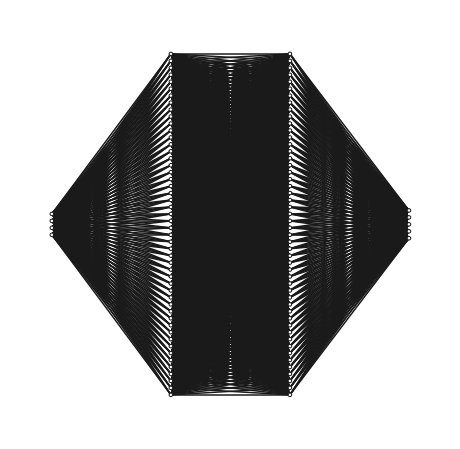

In [58]:
from draw_neural_net import *
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.axis('off')
if Best_N_Hidden_Layers==1:
  draw_neural_net(ax, .1, .9, .1, .9, [np.size(x_train,axis=1), Best_N_neurons, np.size(class_names1)])
elif Best_N_Hidden_Layers==2:
  draw_neural_net(ax, .1, .9, .1, .9, [np.size(x_train,axis=1), Best_N_neurons, Best_N_neurons, np.size(class_names1)])
print('Neurons per layer:{}' .format(Best_N_neurons))

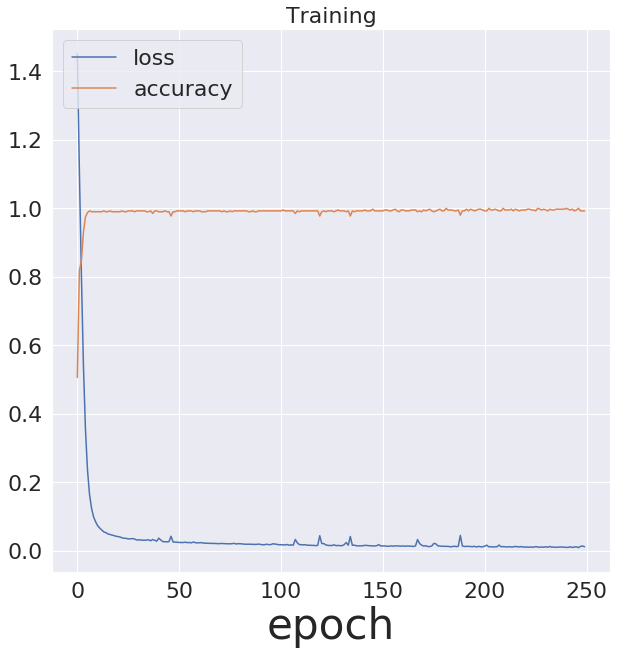

In [59]:
PlotHistory(FinalClassifier.history)

In [60]:
score = FinalClassifier.model.evaluate(X_test_normalized, y_test, verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 5.122181141309233e-05
Test accuracy: 1.0


In [0]:
y_test_hat = model.predict(X_test_normalized)
y_test_pred = np.argmax(y_test_hat,axis=1)

In [62]:
confMatrix = pd.DataFrame(confusion_matrix(y_test_pred, y_test),index=class_names1, columns=class_names1,) #matriz de confusão
confMatrix.index.name = 'Actual'
confMatrix.columns.name = 'Predicted'
print(confMatrix)

Predicted  nominal  CH  CR  SC  CQ
Actual                            
nominal          4   0   0   0   0
CH               0  12   0   0   0
CR               0   0   8   0   0
SC               0   0   0   8   0
CQ               0   0   0   0  13


In [0]:
# sklearn.metrics.plot_confusion_matrix(FinalClassifier, X_test_normalized, y, labels=class_names1)

In [0]:
# tic()
# results={}
# N_executions=30 #Numero de execuções
# K=10 #Numero de divisoes do Kfold
# Input=Feat[0]
# X=Input
# normalized_X = preprocessing.normalize(X)
# y=Output_Clas
# Classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_classifier, epochs=300, verbose=0)
# for J in range(0,N_executions):
#    print('\nDataset:',0+1,'\ Run:',J+1)
#    results[J,0] = cross_validate(Classifier, normalized_X, y, cv=K)
#    print('\nEnd of Executions Dataset:',0+1,'\ Run:',J+1)    
# toc()             

In [0]:
# results

# Regressão

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c38f41190>]],
      dtype=object)

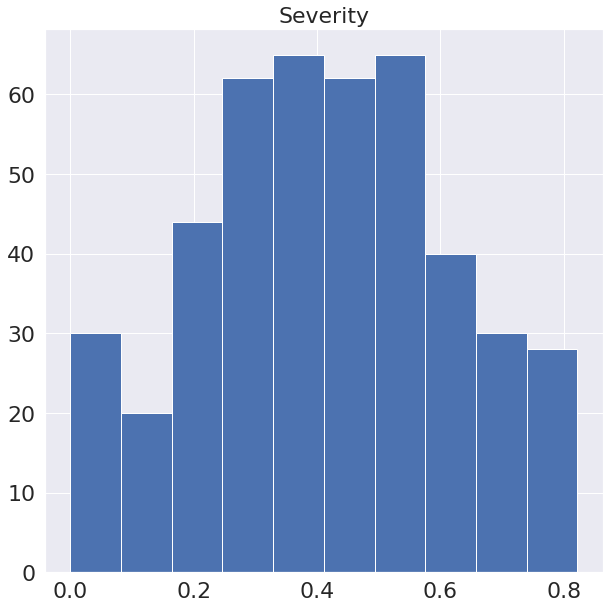

In [66]:
df_Out_Reg=pd.DataFrame(data=Output_Reg, columns=['Severity'])
df_Out_Reg.hist()

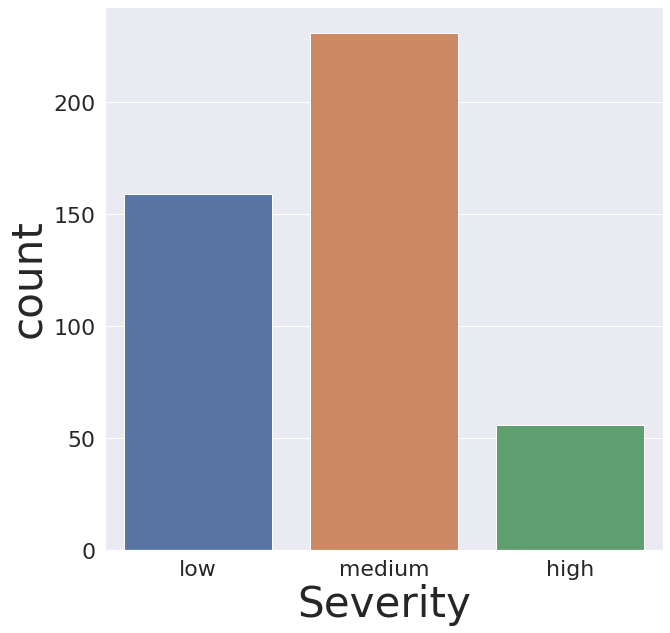

In [67]:
df_Out_CatReg = pd.cut(df_Out_Reg['Severity'],bins=[-0.01,0.33, 0.66, 1],labels=['low','medium','high'])
df_Out_CatReg_Num=pd.cut(df_Out_Reg['Severity'],bins=[-0.01,0.33, 0.66, 1],labels=[0,1,2])
df_Out_CatReg=pd.DataFrame(data=df_Out_CatReg, columns=['Severity'])
ax = sns.countplot(x="Severity",data=df_Out_CatReg)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c2055f050>]],
      dtype=object)

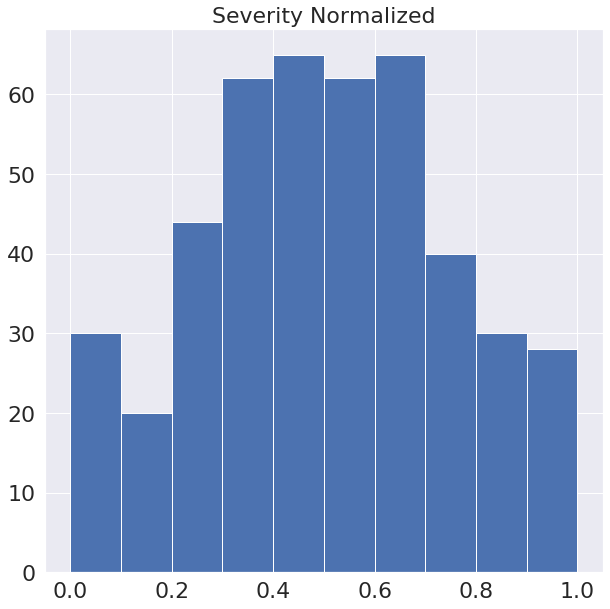

In [68]:
scaler=preprocessing.MinMaxScaler()
scaler.fit(Output_Reg)
df_normalized_Y_reg=pd.DataFrame(data=scaler.transform(Output_Reg),columns=['Severity Normalized'])
df_normalized_Y_reg.hist()
# plt.savefig('Hist_Severity.png')

In [69]:
y=np.array(df_normalized_Y_reg['Severity Normalized'])
normalized_X = preprocessing.normalize(X)
df_normalized_Y_reg.describe()

,Severity Normalized
count,446.000000
mean,0.504182
std,0.242076
min,0.000000
25%,0.328378
50%,0.504730
75%,0.680997
max,1.000000


In [0]:
# def create_regression(n_neurons=1,n_hidden_layers=1,t_activation='relu'):
# 	# create model
#   if n_hidden_layers==1:
#     model = tf.keras.Sequential([tf.keras.layers.Dense(n_neurons, activation=t_activation),tf.keras.layers.Dense(1, activation='linear')]) #Regressao	
#   elif n_hidden_layers==2:
#     model = tf.keras.Sequential([tf.keras.layers.Dense(n_neurons, activation=t_activation),tf.keras.layers.Dense(n_neurons, activation=t_activation),tf.keras.layers.Dense(1, activation='linear')]) #Regressao	
#     # Compile model
#   model.compile(optimizer='adam',loss='mse',metrics=['mse'])
#   return model

In [0]:
def create_regression(n_neurons=1,n_hidden_layers=1,t_activation='relu',t_optmizer=1,lr=0.001,mom=0.00):
	# create model
  if n_hidden_layers==1:
    model = tf.keras.Sequential([tf.keras.layers.Dense(n_neurons, activation=t_activation),tf.keras.layers.Dense(1, activation='linear')]) #Regressao	
  elif n_hidden_layers==2:
    model = tf.keras.Sequential([tf.keras.layers.Dense(n_neurons, activation=t_activation),tf.keras.layers.Dense(n_neurons, activation=t_activation),tf.keras.layers.Dense(1, activation='linear')]) #Regressao	
    # Compile model
  if t_optmizer==1:
      model.compile(optimizer='adam',loss='mse',metrics=['mse'])	
  elif t_optmizer==2:
      sgd=tf.keras.optimizers.SGD(learning_rate=lr, momentum=mom, nesterov=False)
      model.compile(optimizer=sgd,loss='mse',metrics=['mse'])	
  return model

In [0]:
# tic()
# K_n=10
# Regressor = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_classifier,batch_size=1, epochs=1, verbose=0)
# T_activation = ['relu'] #['relu', 'tanh'] 
# N_neurons = [5, 10, 15, 20, 100]
# N_hidden_layers=[1,2]
# ##############################################################
# epochs = [100,200,300] 
# batch_size = [1,2,10,30] 
# param_grid = dict(n_neurons=N_neurons, n_hidden_layers=N_hidden_layers, t_activation=T_activation, epochs=epochs, batch_size=batch_size)
# ##############################################################
# grid = GridSearchCV(estimator=Regressor, param_grid=param_grid, verbose=1, cv=K_n)
# grid_result = grid.fit(normalized_X,y) 
# toc()

In [73]:
tic()
grid_iterations=500
K_n=10
Regressor = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_regression,batch_size=1, epochs=1, verbose=0)
T_activation = ['relu','tanh']
N_neurons = np.arange(2,101,1)
N_hidden_layers=[1,2]
T_optmizer=[1,2]
Lr=[1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
Mom=[0.0, 0.5, 0.9, 0.99, 0.999]
##############################################################
epochs = np.arange(50,350,50) 
batch_size = np.arange(1,33,1) 
param_grid = dict(n_neurons=N_neurons, n_hidden_layers=N_hidden_layers, t_activation=T_activation, epochs=epochs, batch_size=batch_size, t_optmizer=T_optmizer, lr=Lr, mom=Mom)
##############################################################
grid = RandomizedSearchCV(Regressor, param_grid, n_iter=grid_iterations,verbose=1, cv=K_n, random_state=2)
grid_result = grid.fit(normalized_X,y) 
toc()
RegResult={}
RegResult[0]=grid_result.best_score_
RegResult[1]=grid_result.best_params_
RegResult[2]=grid_result.cv_results_
with open('GridResult_500p_Regression.pickle', 'wb') as filename:
    pickle.dump(RegResult, filename)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed: 575.3min finished
/home/mateus.gheorghe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.




Elapsed time is 
34560.740563869476
seconds.



In [74]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
rank_pos = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank_pos in zip(means, stds, params, rank_pos):
    print("Rank:%d - %f (%f) with: %r in position" % (rank_pos, mean, stdev, param))

Best: -0.000791 using {'t_optmizer': 1, 't_activation': 'tanh', 'n_neurons': 71, 'n_hidden_layers': 2, 'mom': 0.99, 'lr': 0.0001, 'epochs': 200, 'batch_size': 2}
Rank:250 - -0.006799 (0.008058) with: {'t_optmizer': 1, 't_activation': 'relu', 'n_neurons': 27, 'n_hidden_layers': 2, 'mom': 0.999, 'lr': 1e-05, 'epochs': 50, 'batch_size': 11} in position
Rank:339 - -0.025699 (0.021781) with: {'t_optmizer': 2, 't_activation': 'relu', 'n_neurons': 10, 'n_hidden_layers': 2, 'mom': 0.999, 'lr': 0.0001, 'epochs': 50, 'batch_size': 13} in position
Rank:95 - -0.003906 (0.003834) with: {'t_optmizer': 1, 't_activation': 'tanh', 'n_neurons': 28, 'n_hidden_layers': 2, 'mom': 0.999, 'lr': 1.0, 'epochs': 300, 'batch_size': 19} in position
Rank:477 - nan (nan) with: {'t_optmizer': 2, 't_activation': 'tanh', 'n_neurons': 19, 'n_hidden_layers': 2, 'mom': 0.5, 'lr': 1.0, 'epochs': 200, 'batch_size': 11} in position
Rank:213 - -0.005874 (0.006201) with: {'t_optmizer': 2, 't_activation': 'tanh', 'n_neurons': 

In [75]:
grid_result.cv_results_

{'mean_fit_time': array([ 2.03453536,  1.37219126,  5.95485575,  5.2769989 ,  4.93888786,
         1.53449159,  2.36447413, 11.13797386, 27.69197829, 27.57453868,
         1.66501479,  3.78713949,  0.9712352 ,  1.11412549, 92.61660788,
         1.235831  ,  7.10712881,  3.50606544,  0.95608928,  3.38585327,
         2.73583076,  4.57782922,  5.61806245,  0.81923389, 12.50234034,
         4.77301686,  2.58254483,  1.33907192,  4.50495675,  1.63341837,
         9.35814412,  4.94101427,  1.0307894 ,  7.76372077,  3.21963518,
         3.84421527, 54.0948339 , 18.78983593, 14.55388994,  3.37258306,
         3.23633063,  2.68283243,  3.72279224,  2.95628192, 15.43721824,
         2.10595253,  6.34382026,  6.87951503,  3.99961534, 19.88744397,
         0.73755953,  3.05704396, 18.38971949,  1.15616584,  6.08277848,
         8.39454103,  5.41650381, 24.01368921,  2.35489571, 22.60152171,
         6.79795585,  1.06088631,  1.98699408,  1.43629034,  4.7705924 ,
         5.2119272 ,  1.75866075, 

In [0]:
Best_Batch_size=grid_result.best_params_['batch_size']
Best_Epochs=grid_result.best_params_['epochs']
Best_N_Hidden_Layers=grid_result.best_params_['n_hidden_layers']
Best_N_neurons=grid_result.best_params_['n_neurons']
Best_T_activation=grid_result.best_params_['t_activation']
Best_T_optmizer=grid_result.best_params_['t_optmizer']
Best_learning_rate=grid_result.best_params_['lr']
Best_momentum=grid_result.best_params_['mom']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,y,stratify=np.array(df_Out_CatReg_Num),test_size=np.round(1/K_n,2))
preprocessParams = preprocessing.StandardScaler().fit(x_train)
X_train_normalized = preprocessParams.transform(x_train)
X_test_normalized = preprocessParams.transform(x_test)

In [0]:
#  Aux=pd.DataFrame(data=y_test,columns=['col'])
#  Aux
#  df_x_test=pd.cut(Aux['col'],bins=[-0.01,0.33, 0.66, 1],labels=[0,1,2])
#  df_x_test.hist()
#  df_Out_CatReg_Num.hist()

Testing if the proportions of data and test data are the same


In [79]:
tic()
model=create_regression(Best_N_neurons,Best_N_Hidden_Layers,Best_T_activation,Best_T_optmizer,Best_learning_rate,Best_momentum)  
FinalRegressor=model.fit(X_train_normalized,y_train, epochs = Best_Epochs, batch_size=Best_Batch_size, verbose = 1)
toc()

Train on 401 samples
Epoch 1/200
401/401 [==============================] - 0s 985us/sample - loss: 0.0255 - mse: 0.0255
Epoch 2/200
401/401 [==============================] - 0s 490us/sample - loss: 0.0074 - mse: 0.0074
Epoch 3/200
401/401 [==============================] - 0s 488us/sample - loss: 0.0043 - mse: 0.0043
Epoch 4/200
401/401 [==============================] - 0s 491us/sample - loss: 0.0032 - mse: 0.0032
Epoch 5/200
401/401 [==============================] - 0s 481us/sample - loss: 0.0034 - mse: 0.0034
Epoch 6/200
401/401 [==============================] - 0s 478us/sample - loss: 0.0048 - mse: 0.0048
Epoch 7/200
401/401 [==============================] - 0s 484us/sample - loss: 0.0038 - mse: 0.0038
Epoch 8/200
401/401 [==============================] - 0s 477us/sample - loss: 0.0028 - mse: 0.0028
Epoch 9/200
401/401 [==============================] - 0s 482us/sample - loss: 0.0026 - mse: 0.0026
Epoch 10/200
401/401 [==============================] - 0s 483us/sample - loss:

In [80]:
model.summary()

Model: "sequential_10005"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25173 (Dense)          multiple                  355       
_________________________________________________________________
dense_25174 (Dense)          multiple                  5112      
_________________________________________________________________
dense_25175 (Dense)          multiple                  72        
Total params: 5,539
Trainable params: 5,539
Non-trainable params: 0
_________________________________________________________________


Note that the params are equal to the number of w*n_neurons+b where w is the weight of each neuron and b is the bias associated.


Neurons per layer:71


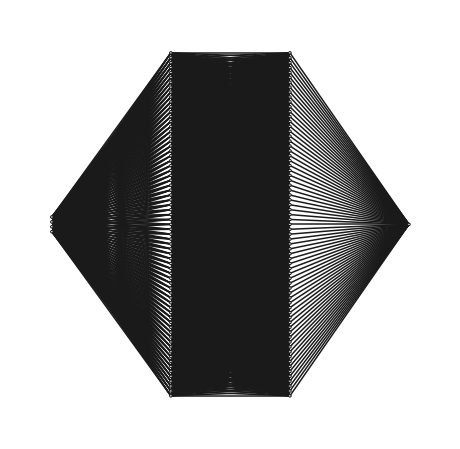

In [81]:
from draw_neural_net import *
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.axis('off')
if Best_N_Hidden_Layers==1:
  draw_neural_net(ax, .1, .9, .1, .9, [np.size(x_train,axis=1), Best_N_neurons, 1])
elif Best_N_Hidden_Layers==2:
  draw_neural_net(ax, .1, .9, .1, .9, [np.size(x_train,axis=1), Best_N_neurons, Best_N_neurons, 1])
print('Neurons per layer:{}' .format(Best_N_neurons))

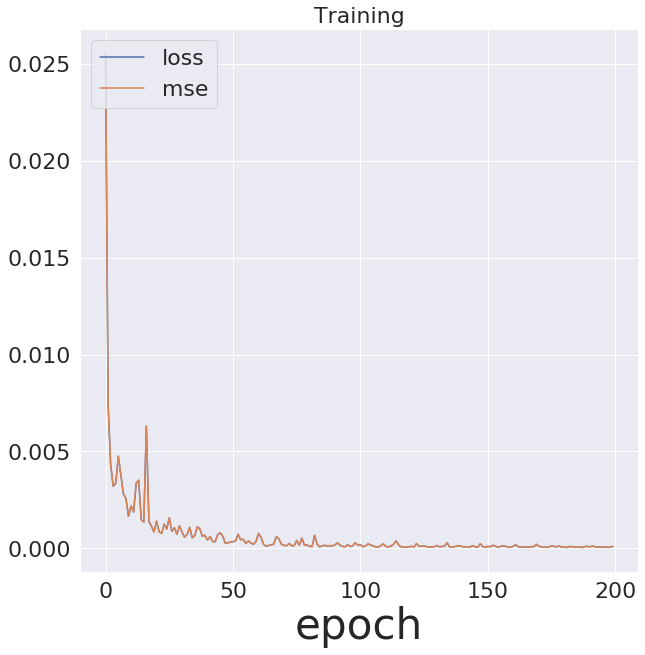

In [82]:
PlotHistory(FinalRegressor.history)

In [83]:
score = FinalRegressor.model.evaluate(X_test_normalized, y_test, verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.00016303126499729438
Test accuracy: 0.00016303126


In [84]:
y_test_pred = model.predict(X_test_normalized)
r2_score(y_test_pred,y_test)

0.9962483527235603

Text(0, 0.5, 'Predicted Values')

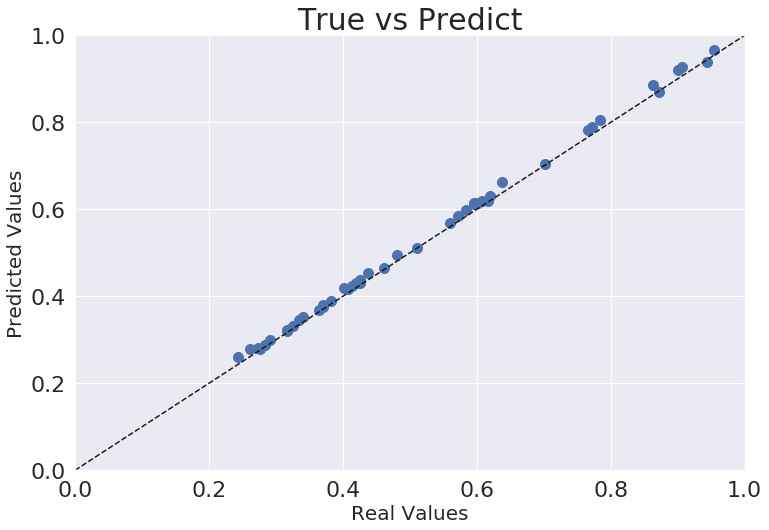

In [85]:
fig, ax = plt.subplots(figsize=(12,8))
ideal = np.linspace(0,1, 10)
ax.margins(0)  
ax.scatter(y_test,y_test_pred,marker="o",s=100)
ax.plot(ideal, ideal + 0,'--k')  # solid black
ax.grid(True)
ax.set_title('True vs Predict', fontsize=30)
ax.set_xlabel('Real Values', fontsize=20)
ax.set_ylabel('Predicted Values', fontsize=20)

In [0]:
# sklearn.metrics.plot_confusion_matrix(FinalClassifier, X_test_normalized, y, labels=class_names1)

In [0]:
# tic()
# results={}
# N_executions=30 #Numero de execuções
# K=10 #Numero de divisoes do Kfold
# Input=Feat[0]
# X=Input
# normalized_X = preprocessing.normalize(X)
# y=Output_Clas
# Classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_classifier, epochs=300, verbose=0)
# for J in range(0,N_executions):
#    print('\nDataset:',0+1,'\ Run:',J+1)
#    results[J,0] = cross_validate(Classifier, normalized_X, y, cv=K)
#    print('\nEnd of Executions Dataset:',0+1,'\ Run:',J+1)    
# toc()             

In [0]:
# tic()
# results={}
# N_executions=30 #Numero de execuções
# K=10 #Numero de divisoes do Kfold
# for J in range(0,N_executions):
#    print('\nDataset:',0+1,'\ Run:',J+1)
#    Input=Feat[0]
#    X=Input
#    y=Output_Clas
#    normalized_X = preprocessing.normalize(X)
#    # create model
#    Regression = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_regression, epochs=300, verbose=0)
#    results[J,0] = cross_validate(Regression, normalized_X, y, cv=K)
#    print('\nEnd of Executions Dataset:',0+1,'\ Run:',J+1)    
# toc()               

In [0]:
# results

In [90]:
TOC()


Elapsed time is 
69438.07871127129
seconds.

